In [93]:
%matplotlib inline
import  pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing

In [2]:
df_mat = pd.read_pickle('./drought.exp.matrix.df.pk')

In [3]:
len(df_mat)

48359

In [4]:
list(enumerate(df_mat.columns))

[(0, 'target_id'),
 (1, 'col0_leaf_cont_7d'),
 (2, 'col0_leaf_drought_7d'),
 (3, 'col0_leaf_drought_6d'),
 (4, 'col0_leaf_cont_6d'),
 (5, 'col0_leaf_cont_5d'),
 (6, 'col0_leaf_drought_5d')]

In [5]:
df_mat.columns = df_mat.columns[[0,5,4,1,6,3,2]]

In [6]:

df_mat['fc_7'] = df_mat.apply(lambda x : np.log10(x['col0_leaf_drought_7d'] / (x['col0_leaf_cont_7d']+0.000001)),axis=1)
df_mat['fc_6'] = df_mat.apply(lambda x : np.log10(x['col0_leaf_drought_6d'] / (x['col0_leaf_cont_6d']+0.000001)),axis=1)
df_mat['fc_5'] = df_mat.apply(lambda x : np.log10(x['col0_leaf_drought_5d'] / (x['col0_leaf_cont_5d']+0.000001)),axis=1)
df_mat['cont_sum'] = df_mat.apply(lambda x : x['col0_leaf_cont_5d'] + x['col0_leaf_cont_6d'] + x['col0_leaf_cont_7d'],axis=1)
df_mat['drought_sum'] = df_mat.apply(lambda x : x['col0_leaf_drought_5d'] + x['col0_leaf_drought_6d'] + x['col0_leaf_drought_7d'],axis=1)
df_mat['distance_drought_cont'] = df_mat.apply(lambda x :  np.linalg.norm(np.array([x['col0_leaf_cont_5d'],x['col0_leaf_cont_6d'],x['col0_leaf_cont_7d']])\
                                                                             -np.array([x['col0_leaf_drought_5d'],x['col0_leaf_drought_6d'],x['col0_leaf_drought_7d']])),axis=1)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log10


In [7]:
fc_cut=200000
m = (np.abs(df_mat['fc_7']) > fc_cut) | (np.abs(df_mat['fc_6']) > fc_cut) | (np.abs(df_mat['fc_5']) > fc_cut)
print len(df_mat[m])
df = df_mat[m]

17026


In [8]:
df_transformed = df_mat.set_index('target_id').T

In [9]:
df_transformed_exp = df_transformed.loc[['col0_leaf_cont_5d','col0_leaf_cont_6d','col0_leaf_cont_7d','col0_leaf_drought_5d','col0_leaf_drought_6d','col0_leaf_drought_7d']]

In [10]:
df_transformed_exp.columns

Index([u'AT1G01010.1', u'AT1G01020.2', u'AT1G01020.6', u'AT1G01020.1',
       u'AT1G01020.4', u'AT1G01020.5', u'AT1G01020.3', u'AT1G01030.2',
       u'AT1G01030.1', u'AT1G01040.1',
       ...
       u'ATMG01290.1', u'ATMG01300.1', u'ATMG01310.1', u'ATMG01320.1',
       u'ATMG01330.1', u'ATMG01350.1', u'ATMG01360.1', u'ATMG01370.1',
       u'ATMG01400.1', u'ATMG01410.1'],
      dtype='object', name=u'target_id', length=48359)

In [94]:
X = preprocessing.scale(df_transformed_exp.values)

In [95]:
y = [0,0,0,1,1,1]

Automatically created module for IPython interactive environment


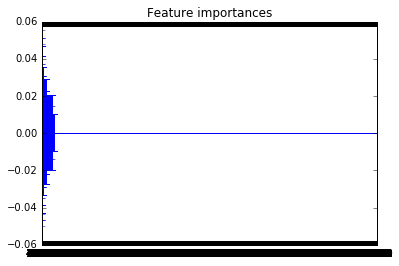

In [96]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier



# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=2500,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [97]:
m = importances.nonzero()[0]
selected_genes = df_transformed_exp.columns[m]

In [113]:
selected_genes

Index([u'AT1G01080.3', u'AT1G01290.2', u'AT1G01355.2', u'AT1G01740.5',
       u'AT1G01970.1', u'AT1G02170.1', u'AT1G02280.2', u'AT1G02610.1',
       u'AT1G02650.1', u'AT1G02850.3',
       ...
       u'AT5G67050.1', u'AT5G67240.1', u'AT5G67270.1', u'AT5G67440.3',
       u'AT5G67550.1', u'ATCG00800.1', u'ATCG00810.1', u'ATCG00830.1',
       u'ATCG00840.1', u'ATCG00870.1'],
      dtype='object', name=u'target_id', length=1809)

In [114]:
X_t = X[:,m]

In [115]:
X_t.shape

(6, 1809)

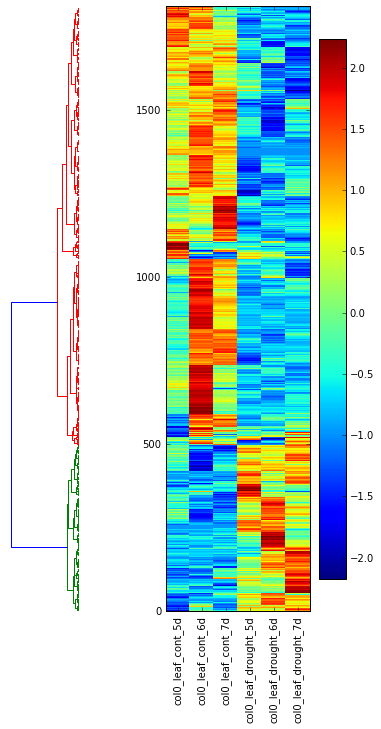

In [106]:
import scipy.cluster.hierarchy as sch
df = selected_df_sub_low
fig = plt.figure(figsize=(5,14))
ax1 = fig.add_axes([0.09,0.1,0.2,0.6])
D  = X_t.T
#from sklearn import preprocessing
#D = preprocessing.scale(D)
Y  = sch.linkage(D, method='ward')
Z = sch.dendrogram(Y, orientation='right')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_axis_off()
zix = Z['leaves']

ax2 = fig.add_axes([0.53,0.1,0.5,0.6])
cax = ax2.pcolor(D[zix])
ax2.axis('tight') # remove blank column
#ax2.set_yticks(np.arange(0.5, len(df.index), 1))
#ax2.set_yticklabels(df.index[zix],ha='right')

ax2.set_xticks(np.arange(0.5, len(df.columns[0:6]), 1))
ax2.set_xticklabels(df.columns[0:6],rotation='vertical')
fig.colorbar(cax, orientation='vertical')
#plt.tight_layout()
plt.show()

In [108]:
selected_df = df_mat.set_index('target_id').loc[selected_genes]

In [109]:
selected_df.shape

(1809, 12)

In [110]:
selected_df.head()
selected_df_sub = selected_df[['col0_leaf_cont_5d','col0_leaf_cont_6d','col0_leaf_cont_7d','col0_leaf_drought_5d','col0_leaf_drought_6d','col0_leaf_drought_7d']]

In [111]:
selected_df_sub.head()

,col0_leaf_cont_5d,col0_leaf_cont_6d,col0_leaf_cont_7d,col0_leaf_drought_5d,col0_leaf_drought_6d,col0_leaf_drought_7d
target_id,,,,,,
AT1G01080.3,3.705130,3.928450,5.714340,6.242370,6.150330,6.734980
AT1G01290.2,10.799700,13.049500,11.549500,8.191940,9.293580,9.370020
AT1G01355.2,0.188684,0.268093,0.218125,0.068109,0.113514,0.123735
AT1G01740.5,1.388190,2.633910,2.634590,1.156790,1.302450,1.177140
AT1G01970.1,20.516900,20.207900,18.334500,23.187200,22.637400,21.364600


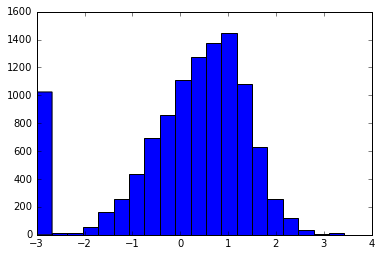

In [112]:
plt.hist(np.log10(selected_df_sub.values.ravel()+0.001),bins=20)
plt.show()